Plot MICRESS® data with Matplotlib
==================================

Average grain radius over time
------------------------------

### Curve fitting

In [1]:
filename = 'Test/T025_GrainGrowth.TabK'

Load simulation data

In [2]:
import numpy as np

time, radius = np.loadtxt(filename, skiprows=1, usecols=[0,1], unpack=True)

Define curve fitting function

In [3]:
def fit(x, a):
    return radius[0] + x ** a

Plot average grain radius over time

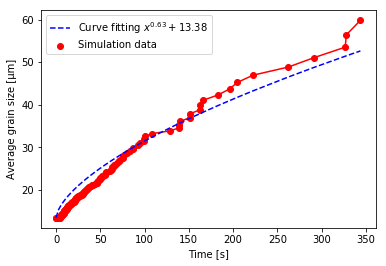

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import optimize

params, params_covariance = optimize.curve_fit(fit, time, radius)

fig, (ax) = plt.subplots(1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Average grain size [μm]')
plt.scatter(time, radius, label='Simulation data', color="red")
plt.plot(time, radius, '-', color="red")
plt.plot(time, fit(time, params[0]), '--', color="blue",
         label='Curve fitting $x^{{{:.2f}}} + {:.2f}$'.format(params[0], radius[0]))
plt.legend(loc='best')
plt.show()

### Plot multiple files

In [5]:
filenames = ['Test/T025_GrainGrowth.TabK', 'Test/T026_GrainGrowth_Misorientation.TabK']

Load simulation data

In [6]:
import numpy as np

times, radiuses = [], []

for filename in filenames:
    time, radius = np.loadtxt(filename, skiprows=1, usecols=[0,1], unpack=True)
    times.append(time)
    radiuses.append(radius)

Plot average grain radius over time

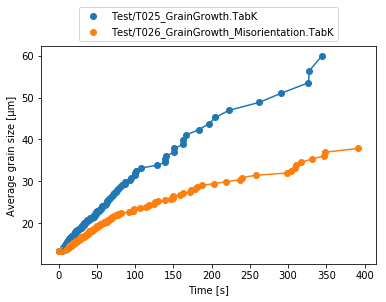

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax) = plt.subplots(1)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Average grain size [μm]')

for filename, time, radius in zip(filenames, times, radiuses):
    a = plt.scatter(time, radius, label='{}'.format(filename))
    plt.plot(time, radius, '-')
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.0))
plt.show()